100%|██████████| 170M/170M [00:20<00:00, 8.45MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train data size: 12000
Validation data size: 3000
Test data size: 3000


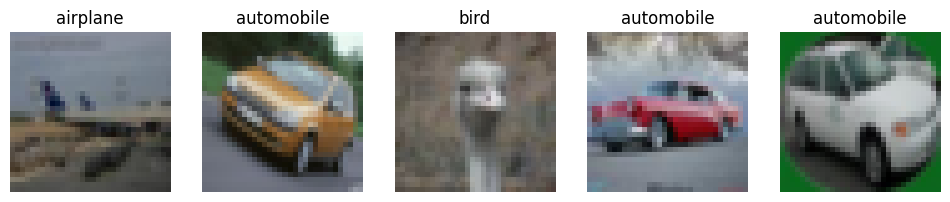

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalize for CIFAR-10
])

# loooading thee CIFAR-10 data
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
#Select 3 classes 0-air, 1- automoobile 2-bird----------

class_names = ['airplane', 'automobile', 'bird']  # You can choose any three=
class_indices = [cifar10.classes.index(name) for name in class_names]

def get_class_indices(dataset, class_indices):
    return [i for i, (_, label) in enumerate(dataset) if label in class_indices]

train_indices = get_class_indices(cifar10, class_indices)
test_indices = get_class_indices(cifar10_test, class_indices)

train_subset = Subset(cifar10, train_indices)
test_subset = Subset(cifar10_test, test_indices)

train_size = int(0.8 * len(train_subset))
val_size = len(train_subset) - train_size

train_idx, val_idx = train_test_split(
    range(len(train_subset)),
    test_size=val_size,
    stratify=[train_subset[i][1] for i in range(len(train_subset))]
)

train_data = Subset(train_subset, train_idx)
val_data = Subset(train_subset, val_idx)

print("Train data size:", len(train_data))
print("Validation data size:", len(val_data))
print("Test data size:", len(test_subset))

# Create DataLoader for each split--------------------------kmkm
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False, num_workers=2)

class CustomCIFAR10Dataset(torch.utils.data.Dataset):
    def __init__(self, dataset, class_indices):
        self.dataset = dataset
        self.class_indices = class_indices
        self.filtered_indices = get_class_indices(self.dataset, self.class_indices)

    def __len__(self):
        return len(self.filtered_indices)

    def __getitem__(self, idx):
        actual_idx = self.filtered_indices[idx]
        img, label = self.dataset[actual_idx]
        return img, label

# -----------------------------------------custom dataset class for demonstration
train_custom_dataset = CustomCIFAR10Dataset(cifar10, class_indices)
train_custom_loader = DataLoader(train_custom_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

import matplotlib.pyplot as plt

def show_images(loader, class_names):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i, ax in enumerate(axes):
        img = images[i].permute(1, 2, 0).numpy() * 0.5 + 0.5
        ax.imshow(img)
        ax.set_title(class_names[labels[i]])
        ax.axis('off')
    plt.show()

show_images(train_loader, class_names)


Training Dataset:


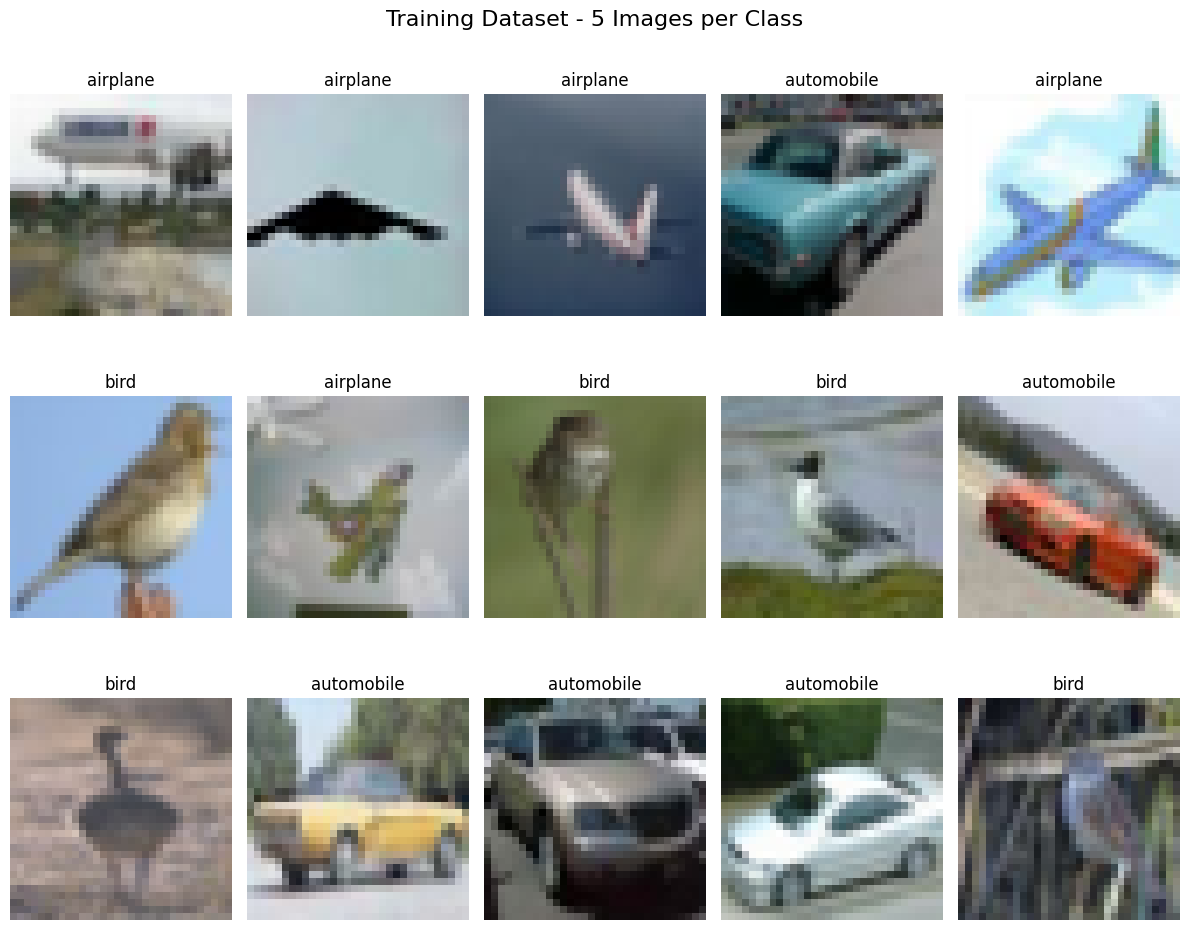

Validation Dataset:


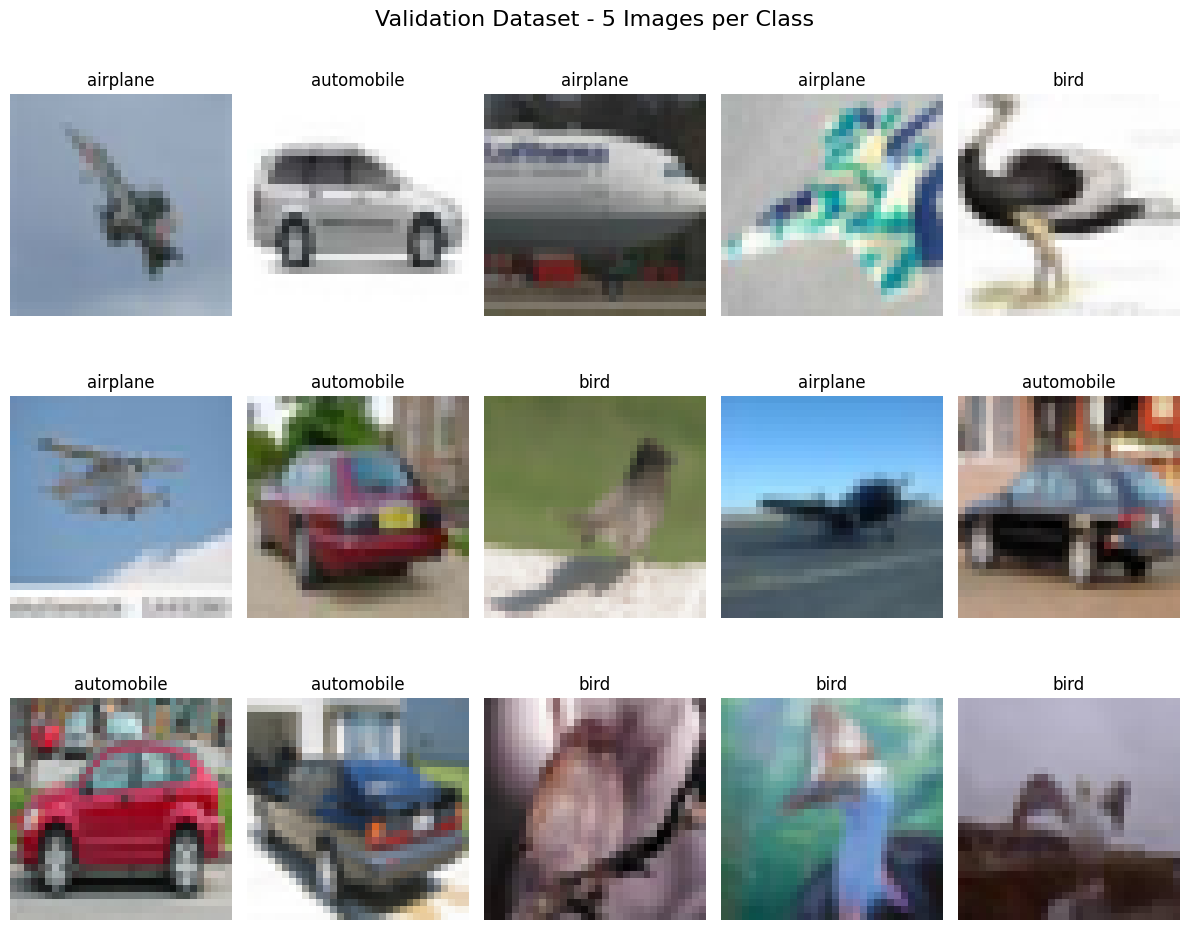

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalize for CIFAR-10
# ])

# loooading thee CIFAR-10 data
# cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# cifar10_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

#Select 3 classes 0-air, 1- automoobile 2-bird----------
# class_names = ['airplane', 'automobile', 'bird']
# class_indices = [cifar10.classes.index(name) for name in class_names]

# Filter indices for the chosen classes
def get_class_indices(dataset, class_indices):
    return [i for i, (_, label) in enumerate(dataset) if label in class_indices]

train_indices = get_class_indices(cifar10, class_indices)
test_indices = get_class_indices(cifar10_test, class_indices)

train_subset = Subset(cifar10, train_indices)
test_subset = Subset(cifar10_test, test_indices)

train_size = int(0.8 * len(train_subset))
val_size = len(train_subset) - train_size

train_idx, val_idx = train_test_split(
    range(len(train_subset)),
    test_size=val_size,
    stratify=[train_subset[i][1] for i in range(len(train_subset))]
)

train_data = Subset(train_subset, train_idx)
val_data = Subset(train_subset, val_idx)

# 0--------------------Create DataLoaders for each dataset split
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False, num_workers=2)

# Visualization----------
def visualize_class_images(data_loader, class_names, title):
    class_counts = {class_name: 0 for class_name in class_names}
    fig, axes = plt.subplots(len(class_names), 5, figsize=(12, 10))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()

    count = 0
    for images, labels in data_loader:
        for img, label in zip(images, labels):
            class_name = class_names[label]
            if class_counts[class_name] < 5:
                img = img.permute(1, 2, 0) * 0.5 + 0.5  # Unnormalize
                axes[count].imshow(img.numpy())
                axes[count].set_title(f"{class_name}")
                axes[count].axis('off')
                count += 1
                class_counts[class_name] += 1
            if all(count >= 5 * len(class_names) for count in class_counts.values()):
                break
        if all(count >= 5 * len(class_names) for count in class_counts.values()):
            break

    plt.tight_layout()
    plt.show()

print("Training Dataset:")
visualize_class_images(train_loader, class_names, "Training Dataset - 5 Images per Class")

print("Validation Dataset:")
visualize_class_images(val_loader, class_names, "Validation Dataset - 5 Images per Class")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#------------------ cnn with 2 conv layers
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        # #first conv layer - input 3 channels (RGB), 16 filters
        # self.conv1=nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=1, stride=1)
        # self.pool1=nn.MaxPool2d(kernel_size=3, stride=2) #maxpool to reduce size
        # #second conv layer
        # self.conv2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1)
        # self.pool2=nn.MaxPool2d(kernel_size=3, stride=3)


        #first conv layer - input 3 channels (RGB), 16 filters
        self.conv1=nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, padding=1, stride=1)
        self.pool1=nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=0, stride=1)
        self.pool2=nn.MaxPool2d(kernel_size=3, stride=3)
        self.flattened_size=self._calculate_flattened_size()

        self.fc1=nn.Linear(self.flattened_size, 16)
        self.fc2=nn.Linear(16, num_classes)


    def _calculate_flattened_size(self):
        with torch.no_grad():
            x=torch.zeros(1, 3, 32, 32)  #sample input
            x=self.pool1(F.relu(self.conv1(x)))
            x=self.pool2(F.relu(self.conv2(x)))
            return x.numel()

    def forward(self, x):
        x=self.pool1(F.relu(self.conv1(x)))
        x=self.pool2(F.relu(self.conv2(x)))

        x=x.view(-1, self.flattened_size)  #flatten

        x=F.relu(self.fc1(x))
        x=self.fc2(x)

        return x

#create model instance------
model=SimpleCNN(num_classes=3)  #3 classes - airplane, automobile, bird
print(model)

sample_batch=torch.randn(4, 3, 32, 32)
out=model(sample_batch)
print(f"output shape: {out.shape}")  #should be (4,3)

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=3, bias=True)
)
output shape: torch.Size([4, 3])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN(num_classes=3)  # Assuming 3 classes as selected previously
model.to(device)  # Move model to the selected device (GPU if available)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate of 0.001

num_epochs = 15
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_predictions / total_predictions
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_predictions += labels.size(0)

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = val_correct_predictions / val_total_predictions
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

torch.save(model.state_dict(), "cnn_model.pth")
print("Model saved as cnn_model.pth")

Epoch [1/15], Train Loss: 0.6433, Train Accuracy: 0.7329, Val Loss: 0.5289, Val Accuracy: 0.7937
Epoch [2/15], Train Loss: 0.4720, Train Accuracy: 0.8129, Val Loss: 0.4689, Val Accuracy: 0.8143
Epoch [3/15], Train Loss: 0.4166, Train Accuracy: 0.8378, Val Loss: 0.4126, Val Accuracy: 0.8370
Epoch [4/15], Train Loss: 0.3833, Train Accuracy: 0.8487, Val Loss: 0.4615, Val Accuracy: 0.8260
Epoch [5/15], Train Loss: 0.3525, Train Accuracy: 0.8614, Val Loss: 0.3895, Val Accuracy: 0.8537
Epoch [6/15], Train Loss: 0.3299, Train Accuracy: 0.8738, Val Loss: 0.3458, Val Accuracy: 0.8647
Epoch [7/15], Train Loss: 0.3150, Train Accuracy: 0.8769, Val Loss: 0.3489, Val Accuracy: 0.8660
Epoch [8/15], Train Loss: 0.2937, Train Accuracy: 0.8877, Val Loss: 0.3531, Val Accuracy: 0.8663
Epoch [9/15], Train Loss: 0.2750, Train Accuracy: 0.8939, Val Loss: 0.3293, Val Accuracy: 0.8787
Epoch [10/15], Train Loss: 0.2593, Train Accuracy: 0.8991, Val Loss: 0.3400, Val Accuracy: 0.8773
Epoch [11/15], Train Loss: 0.

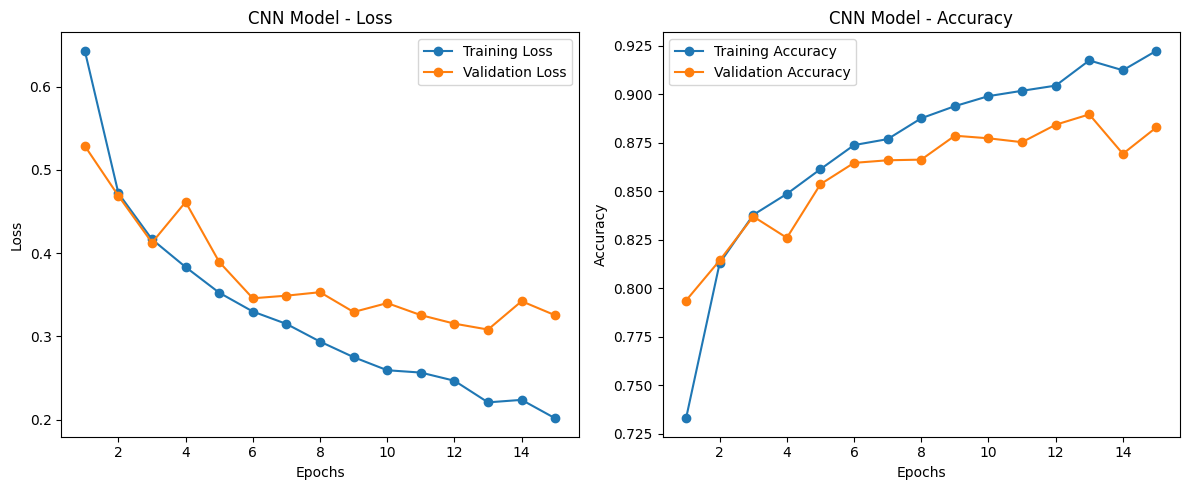

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, title):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, "CNN Model")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

def evaluate_model(loader, model, class_names):
    model.eval()  # Set model to evaluation mode
    all_labels = []
    all_preds = []

    with torch.no_grad():  # No gradient calculation during evaluation
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, f1, cm

train_accuracy, train_f1, train_cm = evaluate_model(train_loader, model, class_names)
val_accuracy, val_f1, val_cm = evaluate_model(val_loader, model, class_names)
test_accuracy, test_f1, test_cm = evaluate_model(test_loader, model, class_names)

print(f"Training Accuracy: {train_accuracy:.4f}, F1-Score: {train_f1:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}, F1-Score: {val_f1:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, F1-Score: {test_f1:.4f}")


Training Accuracy: 0.9299, F1-Score: 0.9297
Validation Accuracy: 0.8830, F1-Score: 0.8825
Test Accuracy: 0.8827, F1-Score: 0.8823


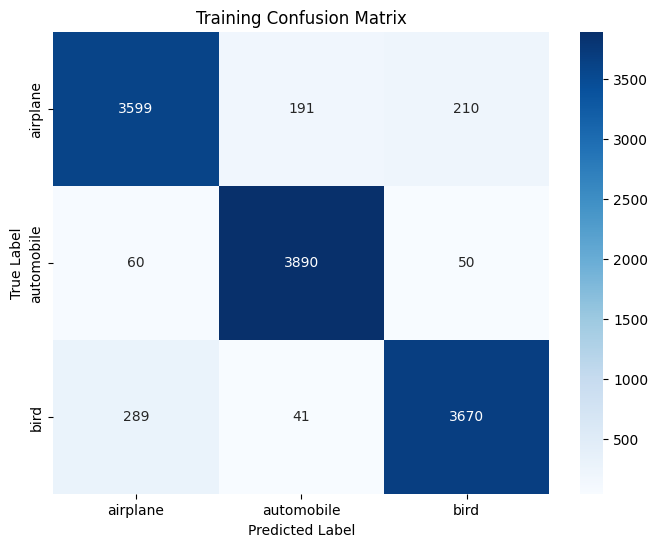

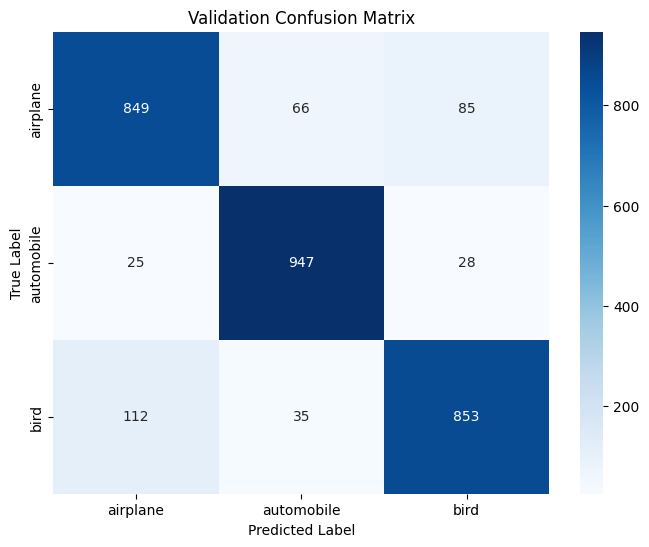

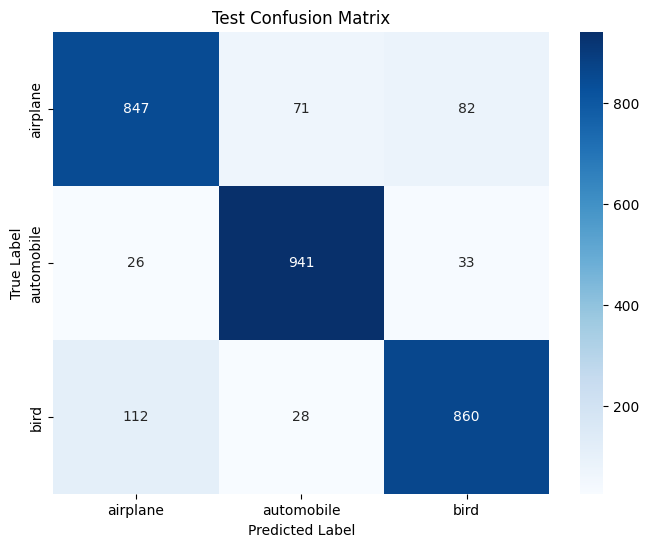

In [ ]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(train_cm, class_names, "Training Confusion Matrix")
plot_confusion_matrix(val_cm, class_names, "Validation Confusion Matrix")
plot_confusion_matrix(test_cm, class_names, "Test Confusion Matrix")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleMLP(nn.Module):
    def __init__(self, input_size=32*32*3, hidden_size=64, num_classes=3):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

mlp_model = SimpleMLP(num_classes=3)  # xample
mlp_model.to(device)

SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=3, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

num_epochs = 15
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    mlp_model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = mlp_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct_predictions / total_predictions
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    mlp_model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = mlp_model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_predictions += labels.size(0)

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = val_correct_predictions / val_total_predictions
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

torch.save(mlp_model.state_dict(), "mlp_model.pth")
print("MLP model saved as mlp_model.pth")


Epoch [1/15], Train Loss: 0.6968, Train Accuracy: 0.7158, Val Loss: 0.5907, Val Accuracy: 0.7650
Epoch [2/15], Train Loss: 0.5706, Train Accuracy: 0.7704, Val Loss: 0.5979, Val Accuracy: 0.7697
Epoch [3/15], Train Loss: 0.5216, Train Accuracy: 0.7942, Val Loss: 0.5575, Val Accuracy: 0.7883
Epoch [4/15], Train Loss: 0.4721, Train Accuracy: 0.8166, Val Loss: 0.5966, Val Accuracy: 0.7777
Epoch [5/15], Train Loss: 0.4381, Train Accuracy: 0.8286, Val Loss: 0.5472, Val Accuracy: 0.7877
Epoch [6/15], Train Loss: 0.4034, Train Accuracy: 0.8476, Val Loss: 0.5307, Val Accuracy: 0.7990
Epoch [7/15], Train Loss: 0.3734, Train Accuracy: 0.8560, Val Loss: 0.5710, Val Accuracy: 0.7970
Epoch [8/15], Train Loss: 0.3508, Train Accuracy: 0.8668, Val Loss: 0.5930, Val Accuracy: 0.7950
Epoch [9/15], Train Loss: 0.3218, Train Accuracy: 0.8806, Val Loss: 0.5636, Val Accuracy: 0.8083
Epoch [10/15], Train Loss: 0.2996, Train Accuracy: 0.8912, Val Loss: 0.6925, Val Accuracy: 0.7837
Epoch [11/15], Train Loss: 0.

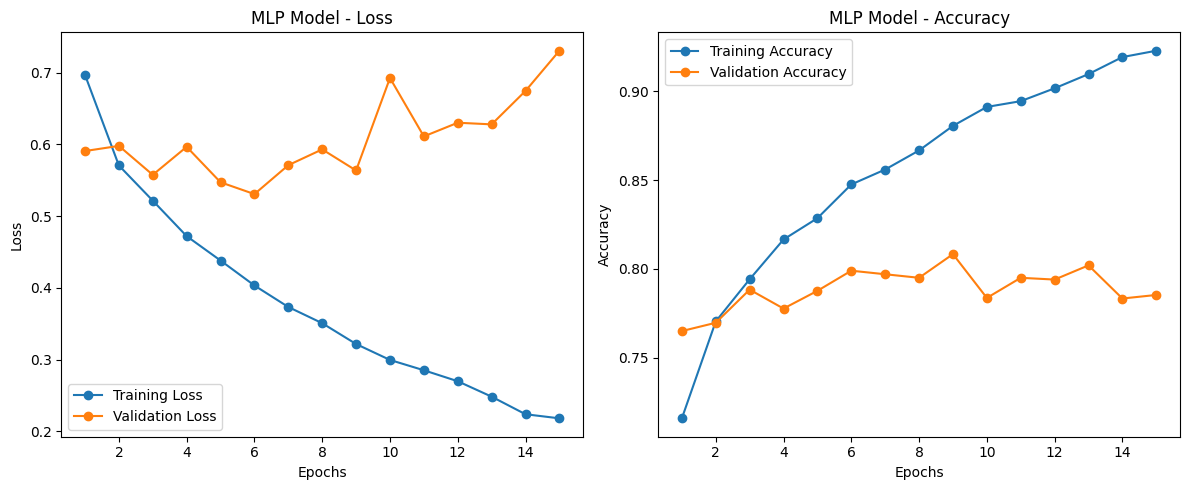

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, title):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss', marker='o')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies, "MLP Model")


<ipython-input-11-05ec36913d80>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  mlp_model.load_state_dict(torch.load("mlp_model.pth"))  # Load trained weights


Test Accuracy: 0.8020
Test F1-Score: 0.8021


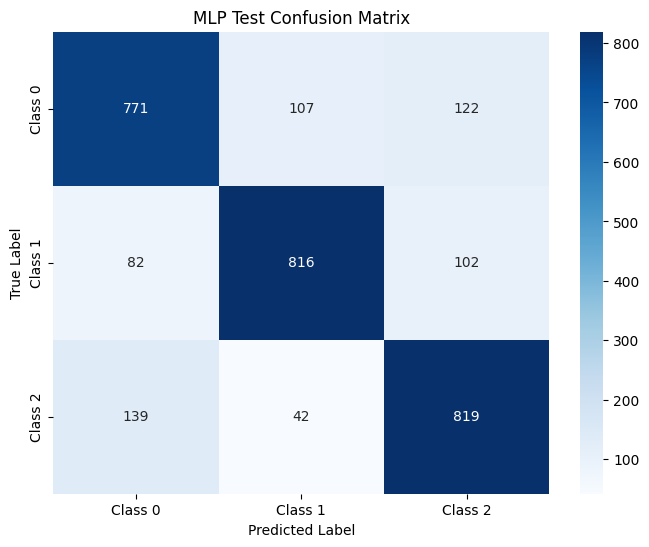

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

\mlp_model = SimpleMLP(num_classes=3)
mlp_model.load_state_dict(torch.load("mlp_model.pth"))
mlp_model.to(device)
mlp_model.eval()

def evaluate_model(loader, model, class_names):
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, f1, cm


class_names = ["Class 0", "Class 1", "Class 2"]

test_accuracy, test_f1, test_cm = evaluate_model(test_loader, mlp_model, class_names)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")

def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_cm, class_names, "MLP Test Confusion Matrix")


Evaluating CNN Model:


<ipython-input-12-907d84bd6eaa>:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load("cnn_model.pth"))
<ipython-input-12-907d84bd6eaa>:42: 

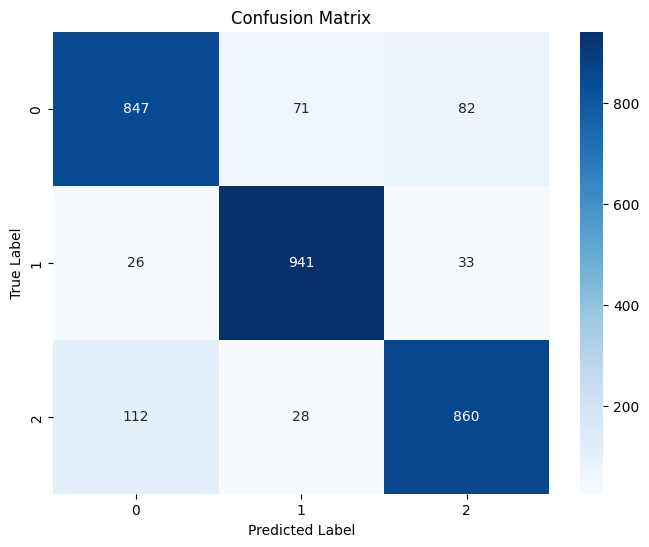

CNN Test Accuracy: 0.8827
CNN F1-Score: 0.8823

Evaluating MLP Model:


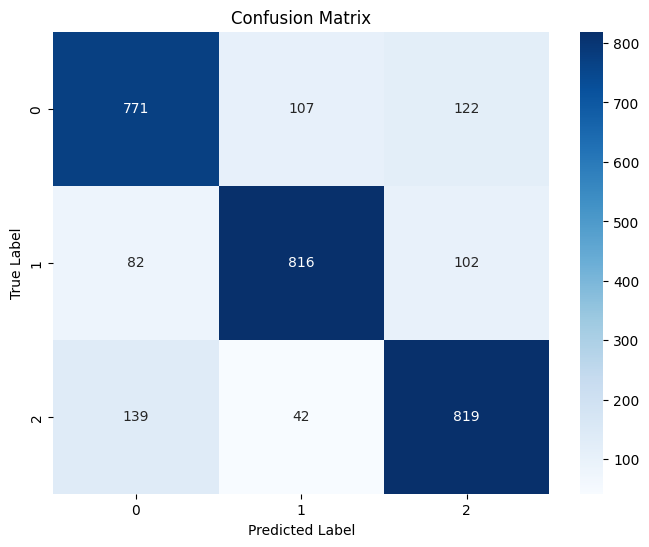

MLP Test Accuracy: 0.8020
MLP F1-Score: 0.8021


In [ ]:
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader, device, num_classes):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    conf_matrix = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy, f1

# Load the CNN model
cnn_model = SimpleCNN(num_classes=3)
cnn_model.load_state_dict(torch.load("cnn_model.pth"))
cnn_model.to(device)

# Load the MLP model
mlp_model = SimpleMLP(num_classes=3)
mlp_model.load_state_dict(torch.load("mlp_model.pth"))
mlp_model.to(device)

print("Evaluating CNN Model:")
cnn_accuracy, cnn_f1 = evaluate_model(cnn_model, test_loader, device, num_classes=3)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")
print(f"CNN F1-Score: {cnn_f1:.4f}")

print("\nEvaluating MLP Model:")
mlp_accuracy, mlp_f1 = evaluate_model(mlp_model, test_loader, device, num_classes=3)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")
print(f"MLP F1-Score: {mlp_f1:.4f}")


In [ ]:
import torch

cnn_model = SimpleCNN(num_classes=3)
cnn_model.load_state_dict(torch.load("cnn_model.pth"))

mlp_model = SimpleMLP(num_classes=3)
mlp_model.load_state_dict(torch.load("mlp_model.pth"))



<ipython-input-17-90fcd995d677>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load("cnn_model.pth"))  # Load the state dictionary
<ipython

<All keys matched successfully>

In [ ]:
import torch
from sklearn.metrics import accuracy_score

cnn_model.eval()
correct_cnn = 0
total_cnn = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_cnn += labels.size(0)
        correct_cnn += (predicted == labels).sum().item()

cnn_accuracy = 100 * correct_cnn / total_cnn
print(f"CNN Accuracy on Test Data: {cnn_accuracy:.2f}%")

mlp_model.eval()
correct_mlp = 0
total_mlp = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mlp_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_mlp += labels.size(0)
        correct_mlp += (predicted == labels).sum().item()

mlp_accuracy = 100 * correct_mlp / total_mlp
print(f"MLP Accuracy on Test Data: {mlp_accuracy:.2f}%")

CNN Accuracy on Test Data: 88.27%
MLP Accuracy on Test Data: 80.20%
